If you would like to investigate the CNN in different ways, use https://github.com/utkuozbulak/pytorch-cnn-visualizations as a reference.

In [2]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from visualization_utils import preprocess_image, convert_to_grayscale
from guided_backprop import GuidedBackprop

In [3]:
BASE_DIR = 'C:\\Users\\HP\\predicting-poverty-replication'
COUNTRY = 'nigeria_2015'
CNN_SAVE_DIR = os.path.join(BASE_DIR, 'models', 'trained_model.pt')

In [4]:
model = torch.load(CNN_SAVE_DIR, map_location=torch.device('cpu'))
model = model.eval()

C:\Users\HP\anaconda3\envs\project\lib\site-packages\torch\serialization.py:868: SourceChangeWarning: source code of class 'torchvision.models.vgg.VGG' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\HP\anaconda3\envs\project\lib\site-packages\torch\serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\HP\anaconda3\envs\project\lib\site-packages\torch\serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing t

In [5]:
os.listdir('images/')

['bad_image.png', 'roads.png', 'water.png']

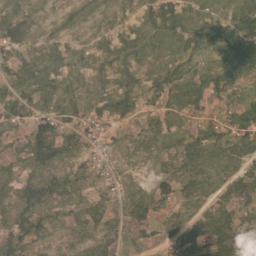

In [6]:
choice = 'roads.png'
image_dir = f'images/{choice}'
image = Image.open(image_dir).convert('RGB')
image

In [7]:
proc_image = preprocess_image(image)

# prediction by model
preds = model(proc_image)
print('prediction:', preds)
target = torch.argmax(preds).item()

prediction: tensor([[ 1.7050,  1.5137, -3.3119]], grad_fn=<AddmmBackward0>)


In [8]:
GBP = GuidedBackprop(model)
guided_grads = GBP.generate_gradients(proc_image, target)
grayscale_guided_grads = convert_to_grayscale(guided_grads)

C:\Users\HP\anaconda3\envs\project\lib\site-packages\torch\nn\modules\module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


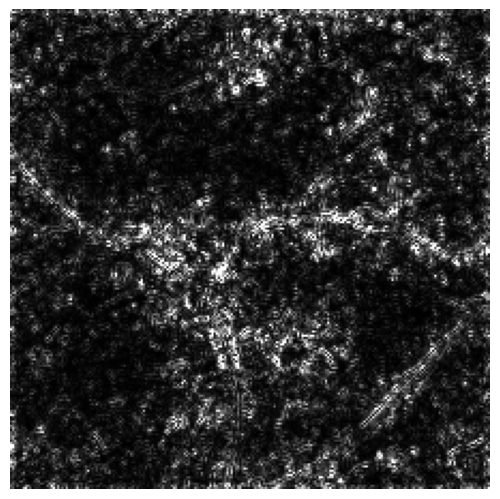

In [9]:
img = np.squeeze(grayscale_guided_grads.transpose(1, 2, 0))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(img, cmap='gray', vmin=0, vmax=1)
fig.savefig('out.png', bbox_inches='tight', pad_inches=0)